In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import root



Polinomial: a = 2.003571, b = 0.855214, c = 4.074800
Reta: d = 8.028286, e = 2.019933
Exponencial: m = 8.995238, n = 2.004564


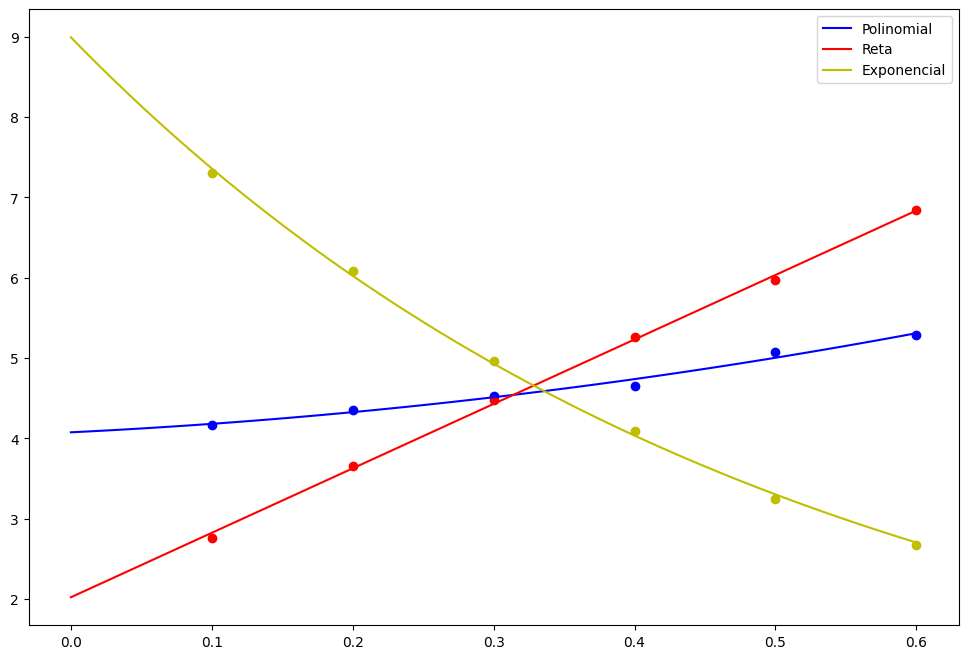

In [2]:
# Data
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
y1 = np.array([4.1700, 4.3500, 4.5250, 4.6570, 5.0800, 5.2860])
y2 = np.array([2.7620, 3.6600, 4.4820, 5.2680, 5.9660, 6.8410])
y3 = np.array([7.30758, 6.08088, 4.95730, 4.08496, 3.24091, 2.67075])

# Ajustar funções aos dados usando o método dos mínimos quadrados
def polinomial(x, a, b, c):
    return a*x**2 + b*x + c

def reta(x, d, e):
    return d*x + e

def exponencial(x, m, n):
    return m * np.exp(-n * x)

params1, params_covariance1 = opt.curve_fit(polinomial, x, y1)
params2, params_covariance2 = opt.curve_fit(reta, x, y2)
params3, params_covariance3 = opt.curve_fit(exponencial, x, y3)

a, b, c = params1
d, e = params2
m, n = params3

print("Polinomial: a = %f, b = %f, c = %f" % (a, b, c))
print("Reta: d = %f, e = %f" % (d, e))
print("Exponencial: m = %f, n = %f" % (m, n))

# Plotando resultados
x_fit = np.linspace(0, 0.6, 100)

plt.figure(figsize=(12, 8))

plt.plot(x_fit, polinomial(x_fit, a, b, c), 'b', label='Polinomial')
plt.plot(x_fit, reta(x_fit, d, e), 'r', label='Reta')
plt.plot(x_fit, exponencial(x_fit, m, n), 'y', label='Exponencial')

plt.scatter(x, y1, color='b', marker='o')
plt.scatter(x, y2, color='r', marker='o')
plt.scatter(x, y3, color='y', marker='o')

plt.legend()
plt.show()

In [3]:
def f1(x):
    return a*x**2 + b*x + c

def f2(x):
    return d*x + e

def f3(x):
    return m * np.exp(-n * x)

# Encontrando o ponto de interseção
x_intersect = np.linspace(0.1, 0.6, 1000)
f1_intersect = f1(x_intersect)
f2_intersect = f2(x_intersect)
f3_intersect = f3(x_intersect)

min_diff = np.inf
best_x = None
for i in range(len(x_intersect)):
    diff = np.abs(f1_intersect[i] - f2_intersect[i]) + np.abs(f1_intersect[i] - f3_intersect[i]) + np.abs(f2_intersect[i] - f3_intersect[i])
    if diff < min_diff:
        min_diff = diff
        best_x = x_intersect[i]

print("x = ", best_x)
print("f1(x) = ", f1(best_x))
print("f2(x) = ", f2(best_x))
print("f3(x) = ", f3(best_x))

x =  0.3287287287287287
f1(x) =  4.572444597480804
f2(x) =  4.659061490052105
f3(x) =  4.654049382684386
